In [188]:
# Machine Learning for the project
# Oran Howard 18672266
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

fifa_results_final = pd.read_csv('fifa_results_final_elo.csv')
fifa_results_final = fifa_results_final.drop(fifa_results_final.columns[[0]], axis=1)
fifa_results_final

,ID,Game_ID,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,...,total_away_goals,total_home_shot,total_away_shot,game_week_home,game_week_away_x,game_week_away_y,avg_home_goals,avg_away_goals,avg_home_ST,avg_away_AT
0,1,0,E0,2014-08-16,Arsenal,Crystal Palace,2,1,H,1,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
1,2,1,E0,2014-08-16,Leicester,Everton,2,2,D,1,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
2,3,2,E0,2014-08-16,Man United,Swansea,1,2,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
3,4,3,E0,2014-08-16,QPR,Hull,0,1,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
4,5,4,E0,2014-08-16,Stoke,Aston Villa,0,1,A,0,...,0.0,0.0,0.0,1,1,1,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2276,375,E0,2020-07-26,Leicester,Man United,0,2,A,0,...,24.0,85.0,95.0,19,1,19,1.944444,1.333333,4.722222,5.277778
2276,2277,376,E0,2020-07-26,Man City,Norwich,5,0,H,2,...,7.0,125.0,54.0,19,1,19,2.888889,0.388889,6.944444,3.000000
2277,2278,377,E0,2020-07-26,Newcastle,Liverpool,1,3,A,1,...,30.0,75.0,96.0,19,1,19,1.055556,1.666667,4.166667,5.333333
2278,2279,378,E0,2020-07-26,Southampton,Sheffield United,3,1,H,0,...,14.0,73.0,42.0,19,1,19,1.000000,0.777778,4.055556,2.333333


In [189]:
# all data 
#regression_data = fifa_results_final[['FTHG','FTAG','HomeTeam','AwayTeam','HTR','ATR',' HGKR','HDefR','HMidR',
                                            #  'HAttR','AGKR','ADefR','AMidR','AAttR','total_home_points','total_away_points',
                                       #      'HomeTeamELO','AwayTeamELO','Difference_Elo','avg_home_goals','total_home_goals','total_away_goals',
                                          #   'avg_away_goals']]#,'avg_home_ST','avg_away_AT']]#,'Difference_Rating','Differnce_Val','Differnce_Wage',
                                            #'Differnce_Attack','Differnce_Mid','Differnce_Def','Differnce_GK']]

# fifa data
#regression_data = fifa_results_final[['FTHG','FTAG','HomeTeam','AwayTeam','HTR','ATR','HTP','HTW','HTV','ATP','ATW','ATV',' HGKR','HDefR','HMidR',
                                      #       'HAttR','AGKR','ADefR','AMidR','AAttR']]#,'Difference_Rating','Differnce_Val','Differnce_Wage','Differnce_Attack','Differnce_Mid','Differnce_Def','Differnce_GK']]

# real data
#regression_data = fifa_results_final[['FTHG','FTAG','HomeTeam','AwayTeam','total_home_points','total_away_points',
                                       #       'HomeTeamELO','AwayTeamELO','Difference_Elo','avg_home_goals','total_home_goals','total_away_goals',
                           #                  'avg_away_goals','avg_home_ST','avg_away_AT','Difference_Rating','Differnce_Val','Differnce_Wage']]

regression_data = fifa_results_final[['FTHG','FTAG','HomeTeam','AwayTeam','HTR','ATR','HTP','HTW','HTV','ATP','ATW','ATV',' HGKR','HDefR','HMidR',
                                            'avg_home_goals','avg_away_goals','avg_home_ST','avg_away_AT','HAttR','AGKR','ADefR','AMidR','AAttR',
                                      'Differnce_Wage','HomeTeamELO','AwayTeamELO','total_home_goals','total_away_goals','avg_home_ST','avg_away_AT',
                                     'B365H','B365A','B365D']]


In [190]:
def split_encode(regression_data):
    
    labelencoder = LabelEncoder()

    HomeTeam = labelencoder.fit_transform(regression_data['HomeTeam'])
    AwayTeam = labelencoder.fit_transform(regression_data['AwayTeam'])
    
    regression_data['HomeTeam'] = HomeTeam
    regression_data['AwayTeam'] = AwayTeam

    df_val_regression = regression_data.values
    #assigns all the columns except the first column to the variable X
    X_regression = df_val_regression[:,2:40]
    #assigns only the first column as variable Y
    Y_regression = df_val_regression[:,0:2]

    X_train_regression, X_test_regression, Y_train_regression, Y_test_regression = train_test_split(X_regression, Y_regression, test_size=0.1665,shuffle=False,random_state=0)

    df_X_test_regression = pd.DataFrame(X_test_regression)
    
    return X_train_regression, X_test_regression, Y_train_regression, Y_test_regression,X_regression,Y_regression

fifa_data = split_encode(regression_data) 
X_train_regression = fifa_data[0]
X_test_regression = fifa_data[1]
Y_train_regression = fifa_data[2]
Y_test_regression = fifa_data[3]

<ipython-input-190-fb1b0c1aed7e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data['HomeTeam'] = HomeTeam
<ipython-input-190-fb1b0c1aed7e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression_data['AwayTeam'] = AwayTeam


In [191]:
X = pd.DataFrame(X_test_regression)
X

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,13.0,18.0,81.347826,73.043478,84.782609,109173.91300,2.962500e+07,76.391304,32173.91304,4.956522e+06,...,76999.99996,2043.737549,1631.131470,0.0,0.0,0.000000,0.000000,1.14,19.00,10.00
1,28.0,14.0,77.478261,83.652174,79.913043,70260.86957,1.167391e+07,87.086957,167391.30430,3.647826e+07,...,-97130.43473,1729.597168,2037.516602,0.0,0.0,0.000000,0.000000,12.00,1.22,6.50
2,2.0,20.0,75.608696,71.956522,79.652174,49347.82609,8.733696e+06,74.739130,22391.30435,3.963043e+06,...,26956.52174,1690.886353,1620.044922,0.0,0.0,0.000000,0.000000,1.95,3.60,3.60
3,4.0,21.0,75.695652,75.086957,77.217391,31521.73913,7.386957e+06,79.260870,40521.73913,8.203261e+06,...,-9000.00000,1681.908691,1674.041138,0.0,0.0,0.000000,0.000000,2.62,2.75,3.20
4,7.0,8.0,75.739130,78.000000,76.565217,46956.52174,8.105435e+06,80.913043,70869.56522,1.290435e+07,...,-23913.04348,1742.758789,1769.762329,0.0,0.0,0.000000,0.000000,3.00,2.37,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,12.0,15.0,76.478261,79.739130,80.695652,60869.56522,1.048696e+07,83.652174,106826.08700,2.004348e+07,...,-45956.52178,1771.743286,1866.702637,35.0,24.0,4.722222,5.277778,3.25,2.20,3.50
376,14.0,18.0,83.652174,73.043478,87.086957,167391.30430,3.647826e+07,76.391304,32173.91304,4.956522e+06,...,135217.39126,1987.501465,1539.389648,52.0,7.0,6.944444,3.000000,1.08,26.00,11.00
377,17.0,13.0,75.869565,81.347826,79.000000,33478.26087,8.869565e+06,84.782609,109173.91300,2.962500e+07,...,-75695.65213,1685.537842,1991.196533,19.0,30.0,4.166667,5.333333,7.50,1.36,5.25
378,21.0,20.0,75.086957,71.956522,79.260870,40521.73913,8.203261e+06,74.739130,22391.30435,3.963043e+06,...,18130.43478,1714.993286,1707.617920,18.0,14.0,4.055556,2.333333,2.15,3.30,3.50


In [192]:
df_Y_train_regression = pd.DataFrame(Y_train_regression)
#X_classification = pd.DataFrame(X_classification)
df_X_test_regression = pd.DataFrame(X_test_regression)
df_Y_test_regression = pd.DataFrame(Y_test_regression)
# change team names to numeric values so we can encode and output them later
home_team_train = df_X_test_regression[0]
home_team_num_list_regression = home_team_train.tolist()
away_team_train = df_X_test_regression[1]
away_team_num_list_regression = away_team_train.tolist() 
home_team_num_list_regression

home_team_num_list_regression = list(map(int, home_team_num_list_regression))
away_team_num_list_regression = list(map(int, away_team_num_list_regression))


In [193]:
def encode_teams(fifa_results_final,home_team_num_list,away_team_num_list):

    label_encoder = LabelEncoder()
    input_classes = fifa_results_final['HomeTeam'].unique()
    label_encoder.fit(input_classes)

    labels_home = fifa_results_final['HomeTeam'].unique()
    encoded_labels = label_encoder.transform(labels_home)
    home_team_name = label_encoder.inverse_transform(home_team_num_list)

    input_classes_away = fifa_results_final['AwayTeam'].unique()
    label_encoder.fit(input_classes_away)

    labels_away = fifa_results_final['AwayTeam'].unique()
    encoded_labels_away = label_encoder.transform(labels_away)
    away_team_name = label_encoder.inverse_transform(away_team_num_list)
    target_names = ['Away Win', 'Draw', 'Home Win']
        
    return home_team_name,away_team_name

class_encoded = encode_teams(fifa_results_final,home_team_num_list_regression,away_team_num_list_regression)   
home_team_name = class_encoded[0]
away_team_name = class_encoded[1]

In [194]:
def get_results(goals):
# get actual results for the test data, so we can compare 
    actual_result = []

    for i in range(len(goals)):
        if goals[i][0] < goals[i][1]:
            actual_result.append('H')
        elif goals[i][1] < goals[i][0]:
            actual_result.append('A')
        else:
            actual_result.append('D')
            
    return actual_result
    

In [195]:
def correct_predictions(pred_goals, Y_test_regression):
    result = []

    column_names = ["Predicted Result", "Actual Result"]
    prediction_data = pd.DataFrame(columns = column_names)
    result = get_results(pred_goals)
    prediction_data['Predicted Result'] = result
    # call the actual result function
    actual_result = get_results(Y_test_regression)
    prediction_data['Actual Result'] = actual_result

    correct_pred = []
    # see if the bookies prediction is the same as the actual result
    for i in range(len(prediction_data)):
        if prediction_data['Predicted Result'][i]  == prediction_data['Actual Result'][i]:
            correct_pred.append("correct")
    # find the percentage of correct predictions
    
    correct = len(correct_pred)/len(prediction_data)*100  
    
    return correct, prediction_data

In [196]:
# a graph to plot actual goals vs predicted goals 
def plot_regression(Y_test_regression,Y_predictions):
    
    plt.plot(Y_test_regression[:,0], color = 'red', label = 'Real home data')
    plt.plot(Y_predictions[:,0], color = 'blue', label = 'Predicted home data')
    plt.plot(Y_test_regression[:,1], color = 'green', label = 'Real away data')
    plt.plot(Y_predictions[:,1], color = 'yellow', label = 'Predicted away data')

    plt.title('Prediction')
    plt.xlabel('Game ID')
    plt.ylabel('Number of goals')
    plt.legend()
    plt.show()


MAE: 0.8732687227847769

MSE: 1.2580204836126976

RMSE: 1.2580204836126976

Correct Predictions:  50.26315789473684


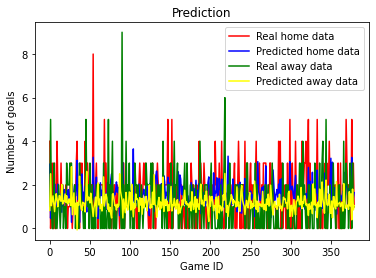

In [197]:
from sklearn import linear_model
import sklearn.metrics as sm
# Linear Regression
regr = linear_model.LinearRegression()
regr.fit(X_train_regression, Y_train_regression)
pred_goals_lin = regr.predict(X_test_regression)
#pred_goals = np.round(pred_goals)
lin_mae = metrics.mean_absolute_error(Y_test_regression,pred_goals_lin)
print('\nMAE:',lin_mae)
print('\nMSE:',metrics.mean_squared_error(Y_test_regression,pred_goals_lin))
print('\nRMSE:',mean_squared_error(Y_test_regression, pred_goals_lin, squared=True))
pred_correct = correct_predictions(pred_goals_lin,Y_test_regression)
print('\nCorrect Predictions: ',pred_correct[0])
plot_regression(Y_test_regression,pred_goals_lin)


MAE: 1.2421052631578946

MSE: 2.7973684210526315

RMSE: 1.6715730123091497

Correct Predictions:  46.578947368421055


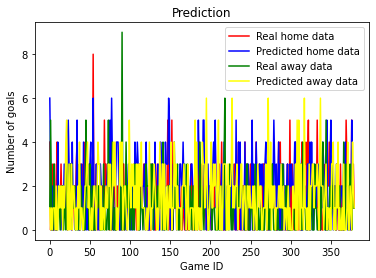

In [198]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# fit model
model.fit(X_train_regression, Y_train_regression)
pred_goals_tree = model.predict(X_test_regression)
#pred_goals_tree = np.round(pred_goals_tree)
dt_mae = metrics.mean_absolute_error(Y_test_regression,pred_goals_tree)
print('\nMAE:',dt_mae)
print('\nMSE:',metrics.mean_squared_error(Y_test_regression,pred_goals_tree))
print('\nRMSE:',mean_squared_error(Y_test_regression, pred_goals_tree, squared=False))
pred_correct = correct_predictions(pred_goals_tree,Y_test_regression)
print('\nCorrect Predictions: ',pred_correct[0])
plot_regression(Y_test_regression,pred_goals_tree)


MAE: 0.979473684210526

MSE: 1.5857894736842113

RMSE: 1.2592386708670293

Correct Predictions:  50.0


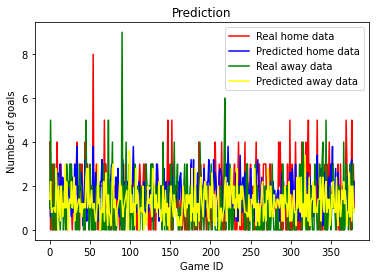

In [199]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor()
# fit model
model.fit(X_train_regression, Y_train_regression)
pred_goals_knn = model.predict(X_test_regression)
knn_mae = metrics.mean_absolute_error(Y_test_regression,pred_goals_knn)
print('\nMAE:',knn_mae)
print('\nMSE:',metrics.mean_squared_error(Y_test_regression,pred_goals_knn))
print('\nRMSE:',mean_squared_error(Y_test_regression, pred_goals_knn, squared=False))
pred_correct = correct_predictions(pred_goals_knn,Y_test_regression)
print('\nCorrect Predictions: ',pred_correct[0])
plot_regression(Y_test_regression,pred_goals_knn)


MAE: 0.8950940094252237

MSE: 1.334555527774648

RMSE: 1.155135360257584

Correct Predictions:  51.05263157894737


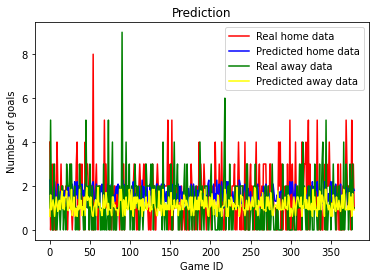

In [200]:
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100,100), activation = 'logistic', max_iter=200)
mor_ = MultiOutputRegressor(mlp)
mor_ = mor_.fit(X_train_regression, Y_train_regression)
pred_goals_mlp = mor_.predict(X_test_regression)
mlp_mae = metrics.mean_absolute_error(Y_test_regression,pred_goals_mlp)
print('\nMAE:',mlp_mae)
print('\nMSE:',metrics.mean_squared_error(Y_test_regression,pred_goals_mlp))
print('\nRMSE:',mean_squared_error(Y_test_regression, pred_goals_mlp, squared=False))
pred_correct = correct_predictions(pred_goals_mlp,Y_test_regression)
print('\nCorrect Predictions: ',pred_correct[0])
plot_regression(Y_test_regression,pred_goals_mlp)


MAE: 0.8950769063287785

MSE: 1.4262251012550378

RMSE: 1.1942465020368278

Correct Predictions:  50.526315789473685


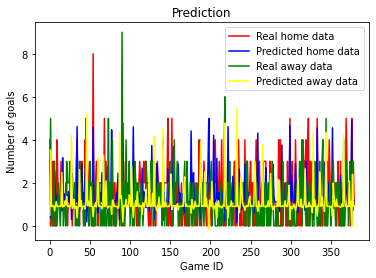

In [201]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

svr_pol = SVR(kernel='poly')
mor_ = MultiOutputRegressor(svr_pol)
mor_ = mor_.fit(X_train_regression, Y_train_regression)
# Generate predictions for testing data
pred_goals_svr_pol = mor_.predict(X_test_regression)
svr_pol_mae = metrics.mean_absolute_error(Y_test_regression,pred_goals_svr_pol)
print('\nMAE:',svr_pol_mae)
print('\nMSE:',metrics.mean_squared_error(Y_test_regression,pred_goals_svr_pol))
print('\nRMSE:',mean_squared_error(Y_test_regression, pred_goals_svr_pol, squared=False))
pred_correct = correct_predictions(pred_goals_svr_pol,Y_test_regression)
print('\nCorrect Predictions: ',pred_correct[0])
plot_regression(Y_test_regression,pred_goals_svr_pol)



MAE: 0.8653181847532869

MSE: 1.3305088474637021

RMSE: 1.1533819161726293

Correct Predictions:  51.578947368421055


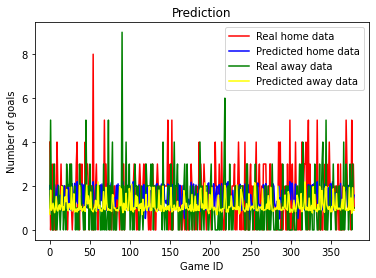

In [202]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

svr_rbf = SVR(kernel='rbf')
mor_ = MultiOutputRegressor(svr_rbf)
mor_ = mor_.fit(X_train_regression, Y_train_regression)
# Generate predictions for testing data
pred_goals_svr_rbf = mor_.predict(X_test_regression)

svr_rbf_mae = metrics.mean_absolute_error(Y_test_regression,pred_goals_svr_rbf)

print('\nMAE:', svr_rbf_mae)
print('\nMSE:',metrics.mean_squared_error(Y_test_regression,pred_goals_svr_rbf))
print('\nRMSE:',mean_squared_error(Y_test_regression, pred_goals_svr_rbf, squared=False))
pred_correct = correct_predictions(pred_goals_svr_rbf,Y_test_regression)
print('\nCorrect Predictions: ',pred_correct[0])

plot_regression(Y_test_regression,pred_goals_svr_rbf)



MAE: 0.8850964912280701

MSE: 1.2696097660818715

RMSE: 1.1267694731710278

Correct Predictions:  52.89473684210526


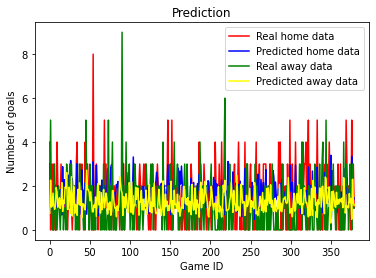

In [203]:
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
RandomForest = RandomForestRegressor(n_estimators = 150, random_state = 0)
# fit the regressor with x and y data
RandomForest.fit(X_train_regression, Y_train_regression)  
pred_goals_RandomForest = RandomForest.predict(X_test_regression)

RandomForest_mae = metrics.mean_absolute_error(Y_test_regression,pred_goals_RandomForest)

print('\nMAE:', RandomForest_mae)
print('\nMSE:',metrics.mean_squared_error(Y_test_regression,pred_goals_RandomForest))
print('\nRMSE:',mean_squared_error(Y_test_regression, pred_goals_RandomForest, squared=False))
pred_correct = correct_predictions(pred_goals_RandomForest,Y_test_regression)
print('\nCorrect Predictions: ',pred_correct[0])
plot_regression(Y_test_regression,pred_goals_RandomForest)
predictions_tree = pred_correct[1]

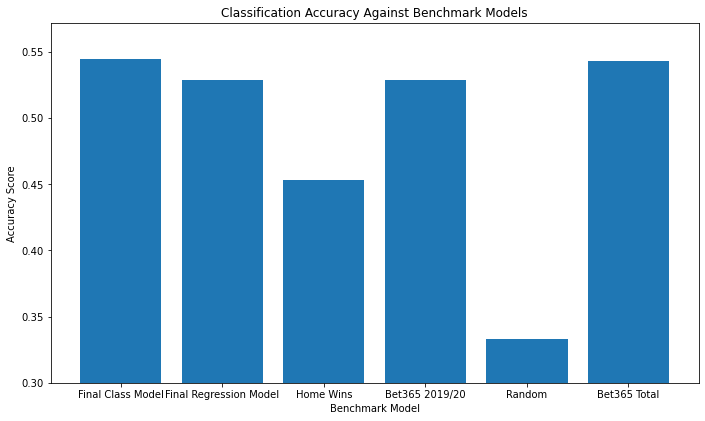

In [204]:
fig = plt.figure(figsize=(9,5))
ax = fig.add_axes([1,1,1,1])
models = ['Final Class Model', 'Final Regression Model','Home Wins','Bet365 2019/20','Random','Bet365 Total']
num_res = [0.5447,0.52894,0.453,0.52894,0.333,0.543257]
plt.title('Classification Accuracy Against Benchmark Models')
plt.xlabel('Benchmark Model')
plt.ylabel('Accuracy Score')

ax.bar(models,num_res)
ax.set_ylim(ymin=0.30)
plt.show()

In [211]:
tree_pred = predictions_tree['Predicted Result']
actual_result = predictions_tree['Actual Result']
predictions_tree

,Predicted Result,Actual Result
0,A,A
1,H,H
2,A,D
3,H,A
4,H,D
...,...,...
375,A,H
376,A,A
377,H,H
378,A,A


In [210]:
predictions = pd.DataFrame(tree_pred)
predictions

predictions['Home Team'] = home_team_name
predictions['Away Team'] = away_team_name
predictions['Home Team Points'] = tree_pred
predictions['Away Team Points'] = tree_pred

predictions.columns = ['Prediction','Home Team','Away Team','Home Team Points','Away Team Points']
predictions

real_results = pd.DataFrame(actual_result)
real_results['Home Team'] = home_team_name
real_results['Away Team'] = away_team_name
real_results['Home Team Points'] = actual_result
real_results['Away Team Points'] = actual_result

real_results.columns = ['Result','Home Team','Away Team','Home Team Points','Away Team Points']
real_results

,Result,Home Team,Away Team,Home Team Points,Away Team Points
0,A,Liverpool,Norwich,A,A
1,H,West Ham,Man City,H,H
2,D,Bournemouth,Sheffield United,D,D
3,A,Burnley,Southampton,A,A
4,D,Crystal Palace,Everton,D,D
...,...,...,...,...,...
375,H,Leicester,Man United,H,H
376,A,Man City,Norwich,A,A
377,H,Newcastle,Liverpool,H,H
378,A,Southampton,Sheffield United,A,A


In [207]:
def add_points(data):
    

    squad_position = data.iloc[:,3].replace(to_replace='H', value=3, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,3].replace(to_replace='A', value=0, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,3].replace(to_replace='D', value=1, regex=False)
    data['Home Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace='A', value=3, regex=False)
    data['Away Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace='H', value=0, regex=False)
    data['Away Team Points'] = squad_position 
    
    squad_position = data.iloc[:,4].replace(to_replace='D', value=1, regex=False)
    data['Away Team Points'] = squad_position 
    
    return data

add_points(predictions)
add_points(real_results)

,Result,Home Team,Away Team,Home Team Points,Away Team Points
0,A,Liverpool,Norwich,0,3
1,H,West Ham,Man City,3,0
2,D,Bournemouth,Sheffield United,1,1
3,A,Burnley,Southampton,0,3
4,D,Crystal Palace,Everton,1,1
...,...,...,...,...,...
375,H,Leicester,Man United,3,0
376,A,Man City,Norwich,0,3
377,H,Newcastle,Liverpool,3,0
378,A,Southampton,Sheffield United,0,3


In [208]:
def get_points(football_results):
    
    # initialise arrays
    home_points = []
    away_points = []
    team_name = []
    cumlative_home_points = []
    cumlative_away_points = []
    
    # converts columns to numeric values 
    football_results["Home Team Points"] = pd.to_numeric(football_results["Home Team Points"])
    football_results["Away Team Points"] = pd.to_numeric(football_results["Away Team Points"])
    
    # get points for all teams at home
    for i, val in (football_results.groupby(football_results['Home Team'])['Home Team Points']).sum().iteritems():
        home_points.append(val)
        home_points = home_points

    # get points for all teams away from home
    for i, val in (football_results.groupby(football_results['Away Team'])['Away Team Points']).sum().iteritems():
        team_name.append(i)
        team_name = team_name
        away_points.append(val)
        away_points = away_points
     
    # add home points and away points together 
    total_points = []
    for i in range(0, len(away_points)):
        total_points.append(home_points[i] + away_points[i])
    
    # convert to a dataframe
    total_points = pd.DataFrame(total_points)
    team_name = pd.DataFrame(team_name)
    # add points and teams together 
    table = pd.concat([team_name.reset_index(drop=True),total_points.reset_index(drop=True)], axis=1)
    table.columns = ['Club', 'Points']
    table = table.sort_values(['Points'],ascending=False)
    
        # keeps a cumlative total of teams home points 
    for i, val in (football_results.groupby(football_results['Home Team'])['Home Team Points']).cumsum().iteritems():
        cumlative_home_points.append(val)
        cumlative_home_points = cumlative_home_points

        # keeps a cumlative total of teams away points 
    for i, val in (football_results.groupby(football_results['Away Team'])['Away Team Points']).cumsum().iteritems():
        cumlative_away_points.append(val)
        cumlative_away_points = cumlative_away_points
     
    football_results['total_home_points'] = cumlative_home_points
    football_results['total_away_points'] = cumlative_away_points
    
    return table

predicted_table = get_points(predictions)
real_table = get_points(real_results)

compare_tables = pd.merge(predicted_table, real_table, left_on='Club', right_on='Club', how='left').drop([], axis=1)

compare_tables.columns = ['Club','Predicted Points','Actual Points']
compare_tables

,Club,Predicted Points,Actual Points
0,Crystal Palace,93,61
1,Norwich,93,87
2,Bournemouth,87,73
3,Burnley,87,51
4,Aston Villa,87,71
5,Newcastle,84,59
6,Sheffield United,81,48
7,Brighton,78,59
8,Southampton,75,55
9,Watford,66,70
